## Knorex R&D Interview Questions

### Instructions: 

1. This test is designed to test your basic programming skills and machine learning/mathematics knowledge. 
2. You will obtain partial credits if you show a clear thought process even if you don't get the final answer correctly. 
3. Please follow good programming practises and make your code easily readable (e.g. variable naming, documentation, comments etc.). 
4. Cite any reference that you think is worth mentioning.
5. Make sure your code is runnable after running the set-up commands. The reviewer is not responsible for installing missing libraries you forget to include.
6. Please read the instructions for each question carefully, especially what is & isn't allowed. If you don't follow the instructions, you won't receive any credit for that question.
7. Most likely, you cannot answer all the questions. If you can score 50\% or 60\%, you can proceed to the next round. So plan your time well.
8. Please do not disclose the question to anyone. Using cloud-based environment like Google colaboratory during the interview is not allowed.

**Good luck!**

### Setting up the dependencies (if needed)

In [33]:
# Set up dependencies if needed. Most likely it'll have been installed for you.
# !pip install Pillow numpy matplotlib
# !pip install numpy torchvision
# !pip install torch
# !pip install tensorflow
import torch
torch.__version__

ModuleNotFoundError: No module named 'torch'

In [21]:
%matplotlib inline

#the usual suspects
import math
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

#use cuda 0 if available; assuming 1 gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

ModuleNotFoundError: No module named 'torch'

## Part 1: Mathmatical & Machine Learning Fundations

### Question 1A: Numerical Analysis (10 points)

In real-world, we often need to find the root of the following equation:

$x: f(x)=0$

However, the function $f(x)$ may be very complex and it's not always possible to solve the equation analytically. Therefore, method $N$ is often used to solve the equation using iterative approach. Method N works as follows:

1. Start from an arbitrary point $x_0$, we calculate the tangent at $(x_0, f(x_0))$.
2. The tangent intersects the $x$ axis at $x_1$. 
3. We then calculate the tangent at $(x_1, f(x_1))$ and intersects the $x$ axis at $x_2$.
4. We repeat the process $n$ times until $|f(x_n)|<\epsilon$.

![alt text](https://drive.google.com/uc?export=view&id=1cjx8paliy9WRLNM9VTEvprblKcgbYZdG)

Please implement the method described above. and calculate the root for $f(x) = 3x^4-5x^3+2x^2-2=0$ using this method with $\epsilon=0.01$.

**Hint:** You need to use an iterative approach. i.e. having a while loop in *method_n* to update $x_i$ until the error is lower than $\epsilon$

In [28]:
from numpy import *
def f(x):
    return 3*(x**4) - 5*(x**3) + 2*(x**2) -2
def _gradient(x):
#       """ return the gradient of f(x).
#       You will likely need to use the gradient. 
#       Hint: You can either differentiate by hand or use a library to do so.
#   """
    return 12*(x**3) - 15*(x**2) + 4*x
def method_n(x):
#   """
#   @param: x - the starting point x_0
#   @returns: the solution that satisfies |f(x)|<epsilon
#   """
    while(abs(f(x)) > 0.01):
        new_x = -(f(x)/(_gradient(x))) + x
        x = new_x
    return x

x = 1
print(method_n(x))

1.4286911262359798


### Question 1B: Tensor Operations (10 points)

Answer the following questions using Tensorflow/Keras/PyTorch/numpy. The following are **NOT** allowed: Python list, for/while loops, Python if conditions. Make sure your implementation is as efficient & elegant as possible. No brute-force solution is accepted.

1. Create a $10\times 10$ tensor with the elements on the border being 1 and all the other elements being 0.
2. Create a random matrix with dimension $10\times 5$. Substract each element by the mean of its corresponding collumn.
3. Create two random matrix with dimension $20\times 8 \times 3$ and calculate their mean squared error.

In [33]:
import tensorflow as tf
# question 1


In [29]:
x = np.ones((10, 10))
x[1:-1, 1:-1] = 0
result = tf.constant(x)

print(result)

tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(10, 10), dtype=float64)


In [18]:
import numpy as np
# question 2
result = np.random.rand(10,5)
result = result - result.mean(axis=0)
# result = result[10] - np.mean()

print(result)

[[-0.13289283 -0.31590972 -0.04107105 -0.0665003   0.14349748]
 [ 0.28554662 -0.0986044   0.07475902 -0.09045933  0.04449038]
 [-0.08452661  0.36944165  0.38359254 -0.20218455  0.16564082]
 [ 0.07199253 -0.27907849 -0.39786437  0.38982043  0.1219333 ]
 [ 0.01619235 -0.35859515  0.40484525 -0.08312128 -0.01877163]
 [ 0.04166793  0.46159491 -0.02239376  0.12246051  0.21280231]
 [ 0.39810268  0.20267857 -0.33472944  0.18059827 -0.43729079]
 [-0.24962696 -0.1173023   0.20296453 -0.21084787 -0.30161662]
 [-0.13555377  0.42262302 -0.19986086 -0.12485221  0.06251173]
 [-0.21090194 -0.28684809 -0.07024187  0.08508633  0.00680302]]


In [29]:
# question 3
result = np.random.rand(20, 8, 3)
result2 = np.random.rand(20, 8, 3)
diff = np.subtract(result, result2)
square = np.square(diff)
mse = square.mean()
print(mse)

0.16477024427856143


### Question 1C: Classifier that Predicts Multiple Labels (10 points)

In traditional multi-class learning, usually only one label is returned (the label which the model predicts the highest score/probability). However, in real-world data, we often have examples which are associated with multiple categories. E.g. A celebrity sings at the Olympic opening can be tags "Sports" and "Arts and Entertainment".

The problem with softmax function is the probability of the categories sum to 1 and it favors only the top 1 or 2 categories. Propose a new cost function to handle the case where multiple labels can be output.

**Hint:** You should consider each prediction separately without normalising using softmax. However, the predictions should be a proper probability.

In [34]:
def cost_fn(Z):
#   """
#   @param: Z: the last linear layer value of the network. with dimension batch_size*num_categories
#   return: the probability for each category with dimension batch_size*num_categories
#   """
    m = tf.math.sigmoid(Z)
    return m

Z = np.random.rand(10, 5)
print(cost_fn(Z))

tf.Tensor(
[[0.67226918 0.72606221 0.57333684 0.6560616  0.66215884]
 [0.60390998 0.63687828 0.62591972 0.59271867 0.60978069]
 [0.64534585 0.51726751 0.66097031 0.64095185 0.56133083]
 [0.67424941 0.53164125 0.69242824 0.56189327 0.68380329]
 [0.72530559 0.60977711 0.69978005 0.54164584 0.66619543]
 [0.5958124  0.57310063 0.54804089 0.64936113 0.66897616]
 [0.71802166 0.67432941 0.65266874 0.52518763 0.72505396]
 [0.52598669 0.52986755 0.58882451 0.51128967 0.63883526]
 [0.51555118 0.65202143 0.50765274 0.61193711 0.57235208]
 [0.64605572 0.61273082 0.69148768 0.69601174 0.53380588]], shape=(10, 5), dtype=float64)


## Part 2: Deep Learning

### Question 2A: Simple Model from Scratch (30 points)

Algorithm $P$ is one of the earliest neural networks model. The model is extremely simple. It calculates the weighted sum of the input and applies a non-linear step function. 

![alt text](https://drive.google.com/uc?export=view&id=1Omc7z8iF51k5AkDlWNv2yxQ0Q0jPUp9_)

Your task is to implement the algorithm and classify a synthesized dataset which contains three labels. You can either implement in pure Python/Numpy or use a library such as Tensorflow, PyTorch or Keras. However, you're not allowed to use pre-built classifiers from any of the libraries. 

**More information: **

1. You can use the sigmoid function or softmax function for the non-linear layer. 
2. Since there're three classes, you might need to train multiple binary classifiers or train a model which is able to predict multi-label.
3. Please implement the single-layer model described above. Don't just copy-n-paste a MLP here.

**Hint:**

In general, you shall follow this sequence:

1. The forward pass: calculate the prediction from the input and the weights. 
2. Calculate the error.
3. Calculate the gradient of each weight w.r.t the error.
4. Use any other optimisation algorithm to update the weights.
5. It's up to you to use either mini-batch or SGD.

In [19]:
# Number of clusters
k = 3

# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

# label of the data
label_1 = np.ones((200, 1))
label_2 = np.ones((200, 1)) * 2
label_3 = np.ones((200, 1)) * 3

data = np.concatenate((data_1, data_2, data_3), axis = 0)
label = np.concatenate((label_1, label_2, label_3), axis = 0)


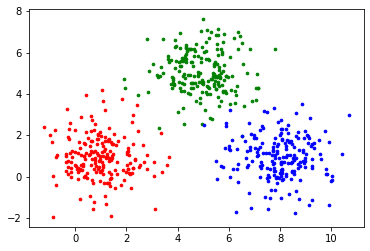

In [22]:
# Plot the data and the label
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if label[j] == i+1])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

In [25]:
# TODO: your answer here
from tensorflow import keras
from keras.layers import Dense
model = keras.Sequential([Dense(3, activation='softmax')])
model.compile(optimizer='SGD', loss='BinaryCrossentropy')
model.fit(data, label, epochs=10)

Epoch 1/10
19/19 [==============================] - 0s 577us/step - loss: 3.9602
Epoch 2/10
19/19 [==============================] - 0s 630us/step - loss: 2.3742
Epoch 3/10
19/19 [==============================] - 0s 629us/step - loss: 2.0160
Epoch 4/10
19/19 [==============================] - 0s 577us/step - loss: 1.8621
Epoch 5/10
19/19 [==============================] - 0s 577us/step - loss: 1.8118
Epoch 6/10
19/19 [==============================] - 0s 630us/step - loss: 1.7974
Epoch 7/10
19/19 [==============================] - 0s 630us/step - loss: 1.7935
Epoch 8/10
19/19 [==============================] - 0s 577us/step - loss: 1.7924
Epoch 9/10
19/19 [==============================] - 0s 633us/step - loss: 1.7921
Epoch 10/10
19/19 [==============================] - 0s 630us/step - loss: 1.7920


In [27]:
test_acc = model.evaluate(data, label, verbose=2)

print('\nTest accuracy:', test_acc)

19/19 - 0s - loss: 1.7920

Test accuracy: 1.7920023202896118


### Question 2B: Free Style (Bonus Question 30 points)

*Note*: Answer this question only if you have extra time.

Non-linearly separable data is one of the major motivations for neural networks models. In the following example, we generate artificial data in the shape of spirals. In this question, you shall implement the model of your choice using any deep learning package. The objective is to achieve the best test set accuracy (for train/test set, you can use random 70/30 split). 

In [8]:
#code from https://github.com/Datatouille/pytorch-Deep-Learning-Minicourse
def plot_shallow_model(X, y, model, e=.0):
    """
    Plot the model from torch weights.
    """
    
    X = X.numpy()
    y = y.numpy()
    w1 = torch.transpose(model[0].weight.data, 0, 1).numpy()
    b1 = model[0].bias.data.numpy()
    
    h = 0.01

    x_min, x_max = (-1.1, 1.1)
    y_min, y_max = (-1.1, 1.1)
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w1) + b1)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    plt.axis('square')

def plot_deep_model(X, y, model, e=.0):
    """
    Plot the model from torch weights.
    """
    
    X = X.numpy()
    y = y.numpy()
    w1 = torch.transpose(model.fc1.weight.data, 0, 1).numpy()
    b1 = model.fc1.bias.data.numpy()
    w2 = torch.transpose(model.fc2.weight.data, 0, 1).numpy()
    b2 = model.fc2.bias.data.numpy()
    
    h = 0.01

    x_min, x_max = (-1.1, 1.1)
    y_min, y_max = (-1.1, 1.1)
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w1) + b1), w2) + b2
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    plt.axis('square')    

#code from http://cs231n.github.io/neural-networks-case-study/
def spiral_gen(N,D,K):
    #N = 100 # number of points per class
    #D = 2 # dimensionality
    #K = 3 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    # lets visualize the data:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    return(X,y)

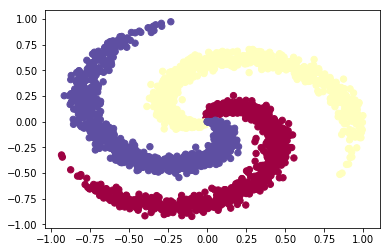

Shape of x: torch.Size([3000, 2])
Shape of y_true: torch.Size([3000])


In [9]:
#generate spiral example
D = 2 #2 features
C = 3 #3 classes
N = 3000 #number of samples

x,y_true = spiral_gen(int(N/C),D,C)
x = torch.from_numpy(x).float()
y_true = torch.from_numpy(y_true).long()
print('Shape of x:',x.shape)
print('Shape of y_true:',y_true.shape)